## Time Series Forecasting

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import os
import platform
import datetime

# Getting Datasets

<h4> Pandas Data Reader has a lot of data (financial in nature) </h4>

In [10]:
import pandas_datareader as pdr

In [19]:
financial_data=pdr.get_data_yahoo('TSLA')   # Financial data TESLA Stock, Returns last 5-year data 
financial_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-31,23.896000,23.521334,23.570000,23.726667,61092000.0,23.726667
2017-09-01,23.839333,23.579332,23.741333,23.693333,45742500.0,23.693333
2017-09-05,23.699333,23.059334,23.586666,23.306000,57526500.0,23.306000
2017-09-06,23.398666,22.770666,23.299999,22.968666,61371000.0,22.968666
2017-09-07,23.498667,22.896667,23.065332,23.374001,63588000.0,23.374001


### Univariate Time Series: - Series focusing only one variable only

<AxesSubplot:>

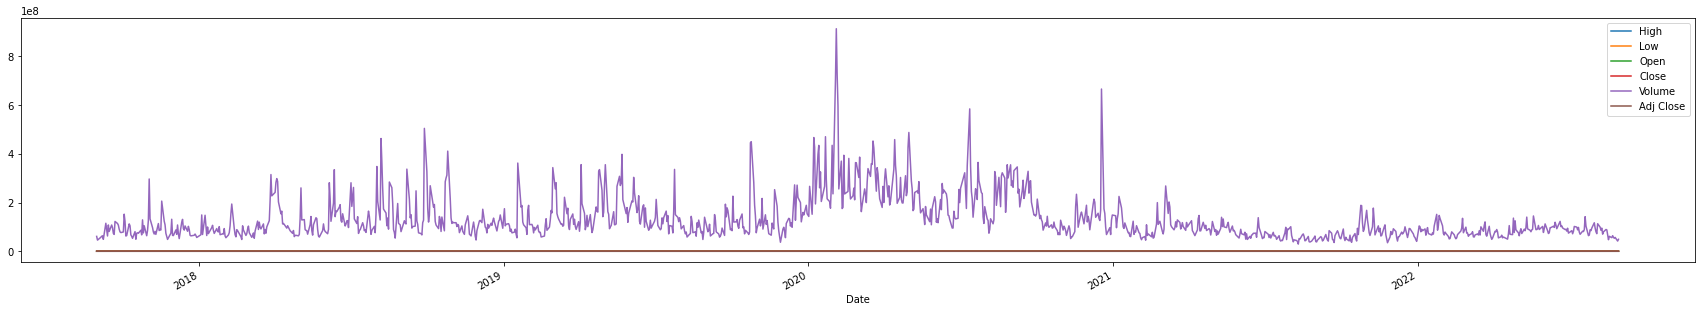

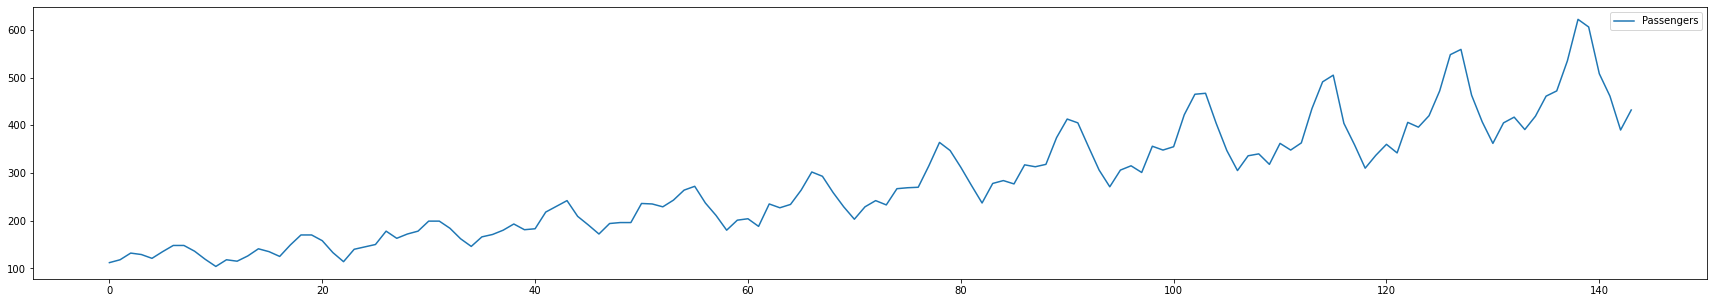

In [35]:
# basic Plotting using Pandas..............
financial_data.plot(figsize=(30,5))

<AxesSubplot:xlabel='Date'>

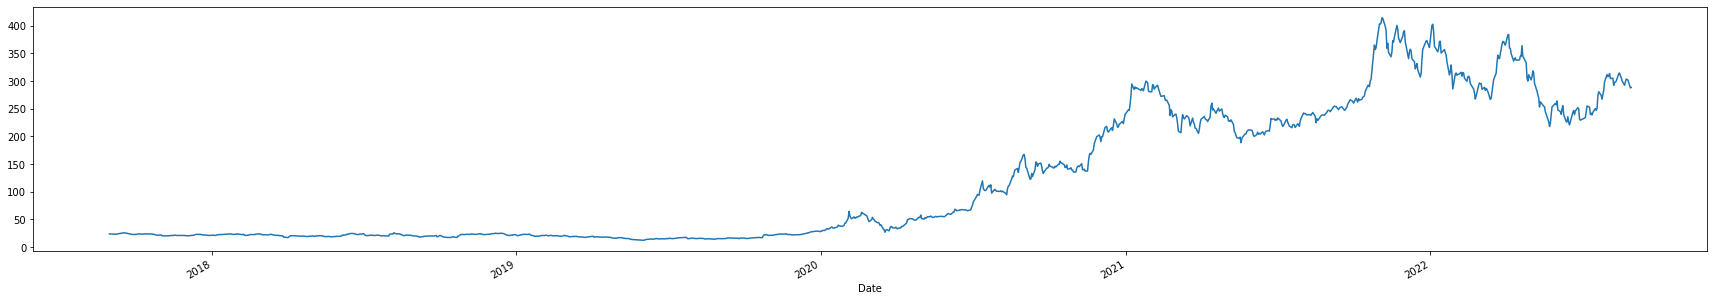

In [36]:
# Basic Plotting single feature
financial_data['High'].plot(figsize=(30,5))

<AxesSubplot:xlabel='Date'>

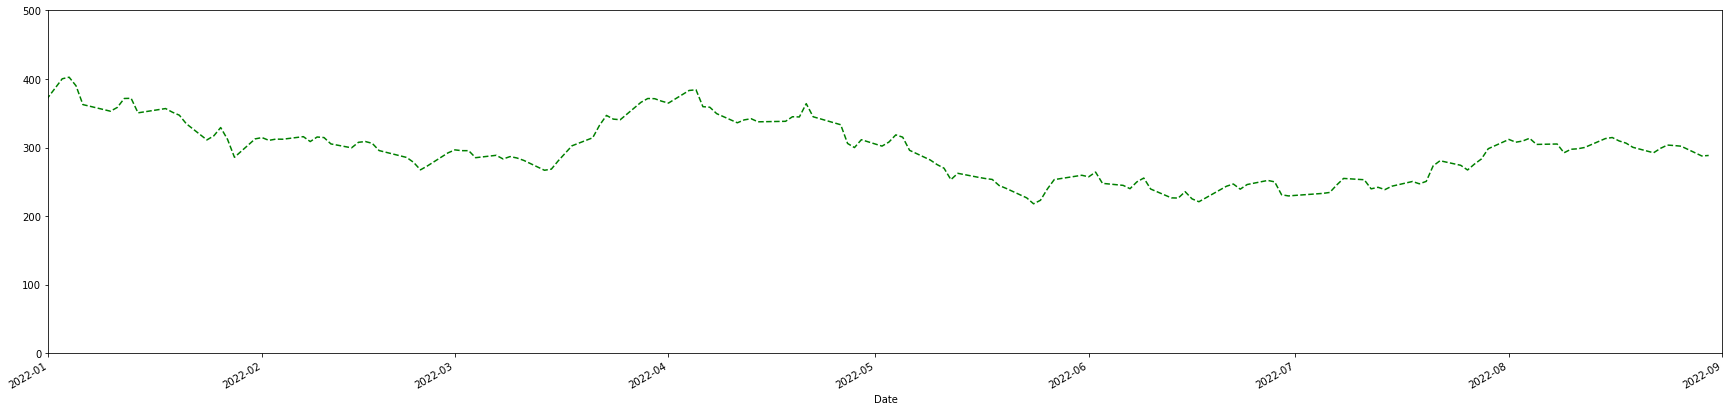

In [44]:
# Setting X and Y Limit and using coloring
financial_data['High'].plot(figsize=(30,7), xlim=['2022-01-01','2022-09-01'], ylim=[0, 500], c='g', ls='--')

In [42]:
# dataset_airline_passenger['Passengers'].plot(figsize=(30,7), xlim=['1949-01-01','1949-09-01'], ylim=[0, 500])

In [ ]:
# Broadcasting index (check what's that) ????

In [51]:
# Time Series Data have index as date-time
financial_data.index

DatetimeIndex(['2017-08-31', '2017-09-01', '2017-09-05', '2017-09-06',
               '2017-09-07', '2017-09-08', '2017-09-11', '2017-09-12',
               '2017-09-13', '2017-09-14',
               ...
               '2022-08-17', '2022-08-18', '2022-08-19', '2022-08-22',
               '2022-08-23', '2022-08-24', '2022-08-25', '2022-08-26',
               '2022-08-29', '2022-08-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [50]:
financial_data.loc['2022-08-1':'2022-08-04'] # Indexing With Loc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-01,311.876678,295.000000,301.276672,297.276672,117042900.0,297.276672
2022-08-02,307.833344,292.666656,294.003326,300.586670,95577600.0,300.586670
2022-08-03,309.549988,301.149994,305.000000,307.396667,80091000.0,307.396667
2022-08-04,313.606659,305.000000,311.000000,308.633331,72256200.0,308.633331


In [52]:
# Subset Data to be Used................
financial_date_time_index=financial_data.loc['2020-01-01':'2022-09-01'].index
financial_open_share=financial_data.loc['2020-01-01':'2022-09-01']['Open']

#### Plotting Some Subplots

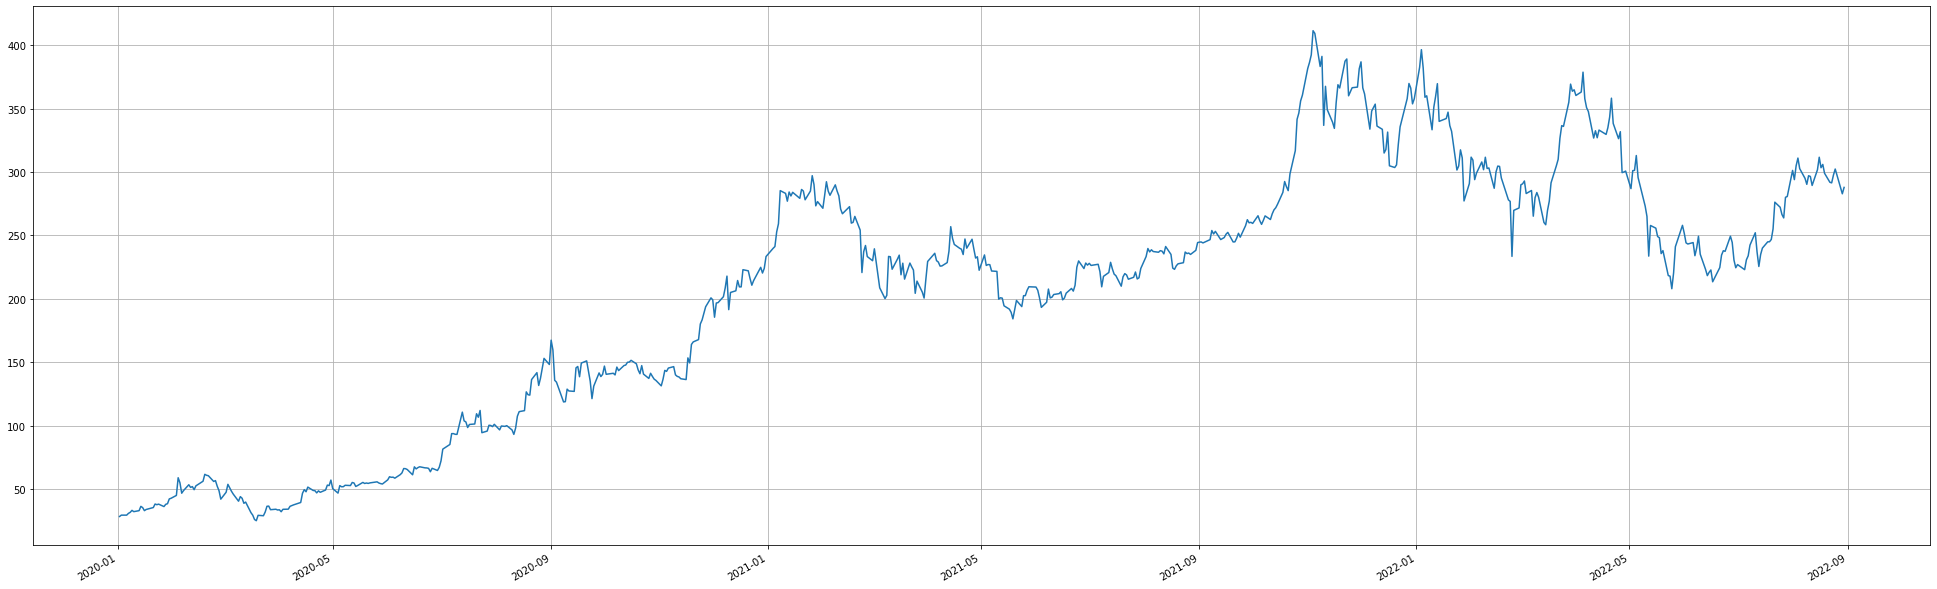

In [59]:
fig, ax =plt.subplots()
plt.tight_layout()                  # For Better Padding between axis.......
fig.set_figheight(10)
fig.set_figwidth(30)
fig.autofmt_xdate()                 # Prevents overlapping of x and y axis scale values 
ax.plot(financial_date_time_index, financial_open_share)
plt.grid()
plt.show()

##### Working on the Index

In [68]:
financial_data=financial_data.reset_index()
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   High       1258 non-null   float64       
 2   Low        1258 non-null   float64       
 3   Open       1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   float64       
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.9 KB


In [63]:
# TO convert a datetime column of string type to datetime
# pd.to_datetime(df_tesla['Date'])

In [70]:
financial_data.set_index('Date', drop=True, inplace=True)
financial_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-31,23.896000,23.521334,23.570000,23.726667,61092000.0,23.726667
2017-09-01,23.839333,23.579332,23.741333,23.693333,45742500.0,23.693333
2017-09-05,23.699333,23.059334,23.586666,23.306000,57526500.0,23.306000
2017-09-06,23.398666,22.770666,23.299999,22.968666,61371000.0,22.968666
2017-09-07,23.498667,22.896667,23.065332,23.374001,63588000.0,23.374001


#### Working on Datetime

In [71]:
financial_data.index[0].weekday()       # Identify what is the weekday 

3

### Time Resampling

In [72]:
financial_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-31,23.896000,23.521334,23.570000,23.726667,61092000.0,23.726667
2017-09-01,23.839333,23.579332,23.741333,23.693333,45742500.0,23.693333
2017-09-05,23.699333,23.059334,23.586666,23.306000,57526500.0,23.306000
2017-09-06,23.398666,22.770666,23.299999,22.968666,61371000.0,22.968666
2017-09-07,23.498667,22.896667,23.065332,23.374001,63588000.0,23.374001
...,...,...,...,...,...,...
2022-08-24,303.646667,296.500000,297.563324,297.096680,57259800.0,297.096680
2022-08-25,302.959991,291.600006,302.359985,296.070007,53230000.0,296.070007
2022-08-26,302.000000,287.470001,297.429993,288.089996,56905800.0,288.089996
